<a href="https://colab.research.google.com/github/YaroslavLazko/Sales-Analysis-Python/blob/main/Global_Sales_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import ipywidgets as widgets
from ipywidgets import interact
import plotly.express as px
from ipywidgets import interact, Dropdown

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
%cd /content/drive/MyDrive/Mate tasks

Mounted at /content/drive
/content/drive/MyDrive/Mate tasks


# Overall conclutions:
* Sales by Product Categories. The number of units sold is relatively evenly distributed across categories. The most profitable category is Cosmetics, while the least profitable is Fruits. Business takeaway: Focus on expanding and promoting high-margin categories such as Cosmetics. For low-profit categories (Fruits), consider margin optimization or cost reduction strategies.
* Sales by Countries. The leaders in units sold are Ukraine, France, Portugal, Finland, and Germany. In terms of profit, Belarus, Hungary, Czech Republic, and Switzerland lead, which suggests higher-value products dominate in these markets. Business takeaway: In high-profit countries, expand premium product lines; in high-volume countries, leverage scale and promotional campaigns to boost sales.
* Sales by Regions. Asia leads in the number of units sold but generates lower profit. Europe generates the highest profit with fewer units sold, indicating higher product prices. Business takeaway: In Asia, scaling volumes of affordable products is effective, while in Europe, focus should be on premium offerings and maximizing margins.
* Sales Channels. Sales channels are fairly balanced, though Offline slightly dominates over Online. Business takeaway: Online sales have strong growth potential. Investing in digital marketing and e-commerce infrastructure could be especially beneficial for high-margin categories.
* Average Delivery Days. Longest delivery times are observed in Cereal and Baby Food, while the shortest are in Personal Care. By country, Hungary has the longest delivery times, while the UK, Portugal, the Baltic states, and Iceland show the shortest. Business takeaway: Long delivery times can affect customer loyalty and repeat purchases. Optimizing logistics for categories and countries with extended delivery times should be a priority. Since there is no clear correlation between product price and delivery days, companies have flexibility in planning supply chains.

# 1. Data overview

In [ ]:
data_country = pd.read_csv("countries.csv")
data_events = pd.read_csv("events.csv")
data_products = pd.read_csv("products.csv")

In [ ]:
# Add table data_country to data_events by common colomn #
merge_1 = pd.merge(data_events, data_country, how="left", left_on="Country Code", right_on="alpha-3")
merge_1

,Order ID,Order Date,Ship Date,Order Priority,Country Code,Product ID,Sales Channel,Units Sold,Unit Price,Unit Cost,name,alpha-2,alpha-3,region,sub-region
0,100640618,10/8/2014,10/18/2014,M,NOR,2103,Online,650.0,205.70,117.11,Norway,NO,NOR,Europe,Northern Europe
1,100983083,8/11/2016,8/11/2016,C,SRB,2103,Offline,1993.0,205.70,117.11,Serbia,RS,SRB,Europe,Southern Europe
2,101025998,7/18/2014,8/11/2014,M,NaN,7940,Online,4693.0,668.27,502.54,NaN,NaN,NaN,NaN,NaN
3,102230632,5/13/2017,6/13/2017,L,MNE,2455,Online,1171.0,109.28,35.84,Montenegro,ME,MNE,Europe,Southern Europe
4,103435266,8/11/2012,9/18/2012,H,SRB,1270,Offline,7648.0,47.45,31.79,Serbia,RS,SRB,Europe,Southern Europe
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1325,994504153,1/10/2017,1/13/2017,M,SWE,4594,Online,4734.0,9.33,6.92,Sweden,SE,SWE,Europe,Northern Europe
1326,994978797,12/5/2014,1/2/2015,H,ITA,1270,Offline,5192.0,47.45,31.79,Italy,IT,ITA,Europe,Southern Europe
1327,996754205,9/20/2010,9/22/2010,L,RUS,7331,Offline,574.0,255.28,159.42,Russia,RU,RUS,Europe,Eastern Europe
1328,998043382,6/15/2010,7/3/2010,H,MLT,8293,Online,2070.0,437.20,263.33,Malta,MT,MLT,Europe,Southern Europe


In [ ]:
# Add table data_products to previous table by common colomn and make copy for avoid mistakes with rewrite original table #
# The columns of the table that were duplicated after the join have been removed #
data_old = pd.merge(merge_1, data_products, how="left", left_on="Product ID", right_on="id")
data = data_old.drop(columns=["alpha-3", "id"])
df = data.copy()
df

,Order ID,Order Date,Ship Date,Order Priority,Country Code,Product ID,Sales Channel,Units Sold,Unit Price,Unit Cost,name,alpha-2,region,sub-region,item_type
0,100640618,10/8/2014,10/18/2014,M,NOR,2103,Online,650.0,205.70,117.11,Norway,NO,Europe,Northern Europe,Cereal
1,100983083,8/11/2016,8/11/2016,C,SRB,2103,Offline,1993.0,205.70,117.11,Serbia,RS,Europe,Southern Europe,Cereal
2,101025998,7/18/2014,8/11/2014,M,NaN,7940,Online,4693.0,668.27,502.54,NaN,NaN,NaN,NaN,Household
3,102230632,5/13/2017,6/13/2017,L,MNE,2455,Online,1171.0,109.28,35.84,Montenegro,ME,Europe,Southern Europe,Clothes
4,103435266,8/11/2012,9/18/2012,H,SRB,1270,Offline,7648.0,47.45,31.79,Serbia,RS,Europe,Southern Europe,Beverages
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1325,994504153,1/10/2017,1/13/2017,M,SWE,4594,Online,4734.0,9.33,6.92,Sweden,SE,Europe,Northern Europe,Fruits
1326,994978797,12/5/2014,1/2/2015,H,ITA,1270,Offline,5192.0,47.45,31.79,Italy,IT,Europe,Southern Europe,Beverages
1327,996754205,9/20/2010,9/22/2010,L,RUS,7331,Offline,574.0,255.28,159.42,Russia,RU,Europe,Eastern Europe,Baby Food
1328,998043382,6/15/2010,7/3/2010,H,MLT,8293,Online,2070.0,437.20,263.33,Malta,MT,Europe,Southern Europe,Cosmetics


# 2. Data cleaning

In [ ]:
df.isna().sum()

,0
Order ID,0
Order Date,0
Ship Date,0
Order Priority,0
Country Code,82
Product ID,0
Sales Channel,0
Units Sold,2
Unit Price,0
Unit Cost,0


In [ ]:
df.isna().sum() / df.shape[0] * 100

,0
Order ID,0.000000
Order Date,0.000000
Ship Date,0.000000
Order Priority,0.000000
Country Code,6.165414
Product ID,0.000000
Sales Channel,0.000000
Units Sold,0.150376
Unit Price,0.000000
Unit Cost,0.000000


It has been determined that the proportion of missing (i.e., NaN) values in the columns country code, name, alpha2, region, and subregion is slightly above 6%. In units sold, there are also two missing values, accounting for 0.15%. The likely reason for missing values in these columns is the lack of identification in the country name. Consequently, this leads to an inability to determine the corresponding region, subregion, or country code. As for the missing values in units sold, it is likely that the data were either lost or not recorded. Since the percentage is quite small, it can most likely be attributed to a minor error, either human or machine-related.

In [ ]:
df["Units Sold"] = df["Units Sold"].fillna(df["Units Sold"].median())
df = df.fillna("Unknown")

In [ ]:
df.isna().sum()

,0
Order ID,0
Order Date,0
Ship Date,0
Order Priority,0
Country Code,0
Product ID,0
Sales Channel,0
Units Sold,0
Unit Price,0
Unit Cost,0


The missing values in Units Sold were replaced with the median of the column where values are available, while the missing values in other columns—where the country name, region, or subregion are absent—were replaced with "Unknown", as it is essentially impossible to determine them.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1330 entries, 0 to 1329
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Order ID        1330 non-null   int64  
 1   Order Date      1330 non-null   object 
 2   Ship Date       1330 non-null   object 
 3   Order Priority  1330 non-null   object 
 4   Country Code    1330 non-null   object 
 5   Product ID      1330 non-null   int64  
 6   Sales Channel   1330 non-null   object 
 7   Units Sold      1330 non-null   float64
 8   Unit Price      1330 non-null   float64
 9   Unit Cost       1330 non-null   float64
 10  name            1330 non-null   object 
 11  alpha-2         1330 non-null   object 
 12  region          1330 non-null   object 
 13  sub-region      1330 non-null   object 
 14  item_type       1330 non-null   object 
dtypes: float64(3), int64(2), object(10)
memory usage: 156.0+ KB


In [ ]:
df["Order Date"] = pd.to_datetime(df["Order Date"])
df["Ship Date"] = pd.to_datetime(df["Ship Date"])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1330 entries, 0 to 1329
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Order ID        1330 non-null   int64         
 1   Order Date      1330 non-null   datetime64[ns]
 2   Ship Date       1330 non-null   datetime64[ns]
 3   Order Priority  1330 non-null   object        
 4   Country Code    1330 non-null   object        
 5   Product ID      1330 non-null   int64         
 6   Sales Channel   1330 non-null   object        
 7   Units Sold      1330 non-null   float64       
 8   Unit Price      1330 non-null   float64       
 9   Unit Cost       1330 non-null   float64       
 10  name            1330 non-null   object        
 11  alpha-2         1330 non-null   object        
 12  region          1330 non-null   object        
 13  sub-region      1330 non-null   object        
 14  item_type       1330 non-null   object        
dtypes: d

In [ ]:
cols = ["Order Priority", "Country Code", "Sales Channel",
        "name", "alpha-2", "region", "sub-region", "item_type"]

for col in cols:
    df[col] = df[col].str.strip()

In [ ]:
df.duplicated().sum()

np.int64(0)

In [ ]:
df.describe()

,Order ID,Order Date,Ship Date,Product ID,Units Sold,Unit Price,Unit Cost
count,1.330000e+03,1330,1330,1330.000000,1330.000000,1330.000000,1330.000000
mean,5.412048e+08,2013-10-12 06:09:12.180451072,2013-11-06 00:46:33.383458816,5788.096241,4952.216541,264.893541,187.246812
min,1.006406e+08,2010-01-01 00:00:00,2010-01-10 00:00:00,1270.000000,2.000000,9.330000,6.920000
25%,3.190004e+08,2011-12-16 06:00:00,2012-01-03 00:00:00,3127.000000,2360.750000,81.730000,35.840000
50%,5.387164e+08,2013-10-17 00:00:00,2013-11-09 00:00:00,5988.000000,4962.000000,154.060000,97.440000
75%,7.544628e+08,2015-08-28 18:00:00,2015-10-03 18:00:00,8681.000000,7458.750000,437.200000,263.330000
max,9.998797e+08,2017-07-23 00:00:00,2017-08-31 00:00:00,8969.000000,9999.000000,668.270000,524.960000
std,2.573882e+08,NaN,NaN,2820.728878,2903.012194,217.323460,176.158873


The number of missing values in each column was calculated. In the UNITSOLD column, missing values were replaced with the median. Missing values in the country names were replaced with "UNKNOWN". Additionally, the ORDERDATE and SHIPDATE columns were converted to DATETIME format. String values were also cleaned and standardized for consistency.

# 3. Data analysis and visualization

In [ ]:
# Columns revenue, cost, and profit were added and their values calculated #
df["Total Revenue"] = df["Units Sold"] * df["Unit Price"]
df["Total Cost"] = df["Units Sold"] * df["Unit Cost"]
df["Total Profit"] = df["Total Revenue"] - df["Total Cost"]
df

,Order ID,Order Date,Ship Date,Order Priority,Country Code,Product ID,Sales Channel,Units Sold,Unit Price,Unit Cost,name,alpha-2,region,sub-region,item_type,Total Revenue,Total Cost,Total Profit
0,100640618,2014-10-08,2014-10-18,M,NOR,2103,Online,650.0,205.70,117.11,Norway,NO,Europe,Northern Europe,Cereal,133705.00,76121.50,57583.50
1,100983083,2016-08-11,2016-08-11,C,SRB,2103,Offline,1993.0,205.70,117.11,Serbia,RS,Europe,Southern Europe,Cereal,409960.10,233400.23,176559.87
2,101025998,2014-07-18,2014-08-11,M,Unknown,7940,Online,4693.0,668.27,502.54,Unknown,Unknown,Unknown,Unknown,Household,3136191.11,2358420.22,777770.89
3,102230632,2017-05-13,2017-06-13,L,MNE,2455,Online,1171.0,109.28,35.84,Montenegro,ME,Europe,Southern Europe,Clothes,127966.88,41968.64,85998.24
4,103435266,2012-08-11,2012-09-18,H,SRB,1270,Offline,7648.0,47.45,31.79,Serbia,RS,Europe,Southern Europe,Beverages,362897.60,243129.92,119767.68
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1325,994504153,2017-01-10,2017-01-13,M,SWE,4594,Online,4734.0,9.33,6.92,Sweden,SE,Europe,Northern Europe,Fruits,44168.22,32759.28,11408.94
1326,994978797,2014-12-05,2015-01-02,H,ITA,1270,Offline,5192.0,47.45,31.79,Italy,IT,Europe,Southern Europe,Beverages,246360.40,165053.68,81306.72
1327,996754205,2010-09-20,2010-09-22,L,RUS,7331,Offline,574.0,255.28,159.42,Russia,RU,Europe,Eastern Europe,Baby Food,146530.72,91507.08,55023.64
1328,998043382,2010-06-15,2010-07-03,H,MLT,8293,Online,2070.0,437.20,263.33,Malta,MT,Europe,Southern Europe,Cosmetics,905004.00,545093.10,359910.90


In [ ]:
# Basic operations with string #
cols = ["Sales Channel", "Order Priority", "name", "region", "sub-region", "item_type"]

for col in cols:
    df[col] = df[col].str.title().str.strip()

In [ ]:
# Descreptive analitics #
print(f"Total count of orders: {df["Order ID"].nunique()}")
print(f"Total Profit: {round(df["Total Profit"].sum(), 2)}")
print(f"All country: {df[df["name"] != "Unknown"]["name"].nunique()}")
print(f"Count of product categories: {df["item_type"].nunique()}")
print(f"Sales Channel: {df["Sales Channel"].unique()}")

Total count of orders: 1330
Total Profit: 501842633.12
All country: 45
Count of product categories: 12
Sales Channel: ['Online' 'Offline']


In [ ]:
# Interactive bar plot showing the distributions of Profit, Revenue, Cost, and Units Sold #
def plot_categories(y_axis):
    plt.figure(figsize=(12, 7))
    sns.barplot(data=df, x="item_type", y=y_axis, errorbar=None)
    plt.xticks(rotation=45)
    plt.show()

interact(plot_categories, y_axis=Dropdown(
    options=["Total Profit", "Total Revenue", "Total Cost", "Units Sold"],
    description="Sales metrics",
    value="Total Profit"
))

interactive(children=(Dropdown(description='Sales metrics', options=('Total Profit', 'Total Revenue', 'Total C…

<function __main__.plot_categories(y_axis)>

In [ ]:
# Interative distributions of Total Revenue by counrties #
fig = px.choropleth(df, locations="Country Code", color="Total Revenue", hover_name="name", color_continuous_scale="Viridis")
fig.show()

In [ ]:
# Interative distributions of Total Cost by counrties #
fig = px.choropleth(df, locations="Country Code", color="Total Cost", hover_name="name", color_continuous_scale="Cividis")
fig.show()

In [ ]:
# Interative distributions of Units Sold by counrties #
fig = px.choropleth(df, locations="Country Code", color="Units Sold", hover_name="name", color_continuous_scale="Inferno")
fig.show()

In [ ]:
# Interative distributions of Total Profit by counrties #
fig = px.choropleth(df, locations="Country Code", color="Total Profit", hover_name="name", color_continuous_scale="Plasma")
fig.show()

In [ ]:
# Interactive lineplot with Revenue, Cost, Units Sold and Profit #
def region(y):
    plt.figure(figsize=(5, 8))
    sns.lineplot(data=df, x="region", y=y, errorbar=None)
    plt.show()

interact(region, y=Dropdown(
    options=["Total Revenue", "Total Cost", "Units Sold", "Total Profit"],
    value="Total Revenue",
    description="Sales metrics"
))

interactive(children=(Dropdown(description='Sales metrics', options=('Total Revenue', 'Total Cost', 'Units Sol…

<function __main__.region(y)>

In [ ]:
def sales_channel(y):
    plt.figure(figsize=(5, 8))
    sns.barplot(data=df, x="Sales Channel", y=y, errorbar=None, palette=["pink", "black"])
    plt.show()

interact(sales_channel, y=Dropdown(
    options=["Total Profit", "Total Revenue", "Total Cost", "Units Sold"],
    description="Sales metrics",
    value="Total Profit"
))

interactive(children=(Dropdown(description='Sales metrics', options=('Total Profit', 'Total Revenue', 'Total C…

<function __main__.sales_channel(y)>

In [ ]:
# For making plot we took defference between Ship and Order date #
df["Delivery Time"] = df["Ship Date"] - df["Order Date"]
df["Days for delivery"] = (df["Ship Date"] - df["Order Date"]).dt.days

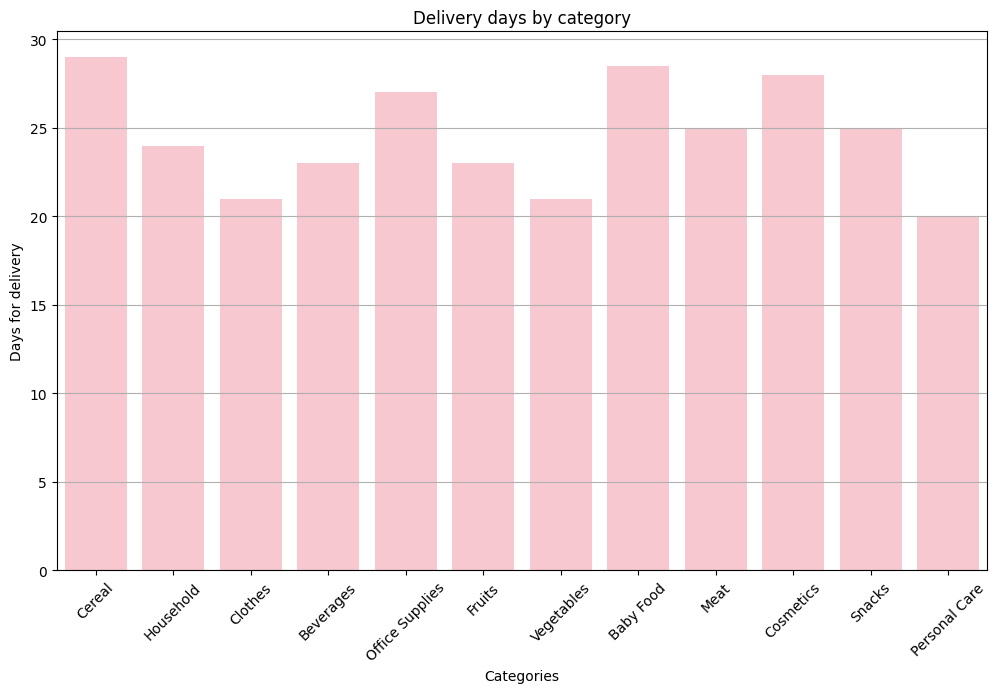

In [ ]:
plt.figure(figsize=(12, 7))
plt.grid(True)
sns.barplot(data=df, x="item_type", y="Days for delivery", estimator="median", errorbar=("ci", False), color = "pink")
plt.xticks(rotation=45)
plt.xlabel("Categories")
plt.ylabel("Days for delivery")
plt.title("Delivery days by category")
plt.show()

In [ ]:
df_median = df.groupby(["Country Code", "name"], as_index=False)["Days for delivery"].median()
fig = px.choropleth(df_median, locations="Country Code", color="Days for delivery", hover_name="name", color_continuous_scale="Viridis")
fig.show()

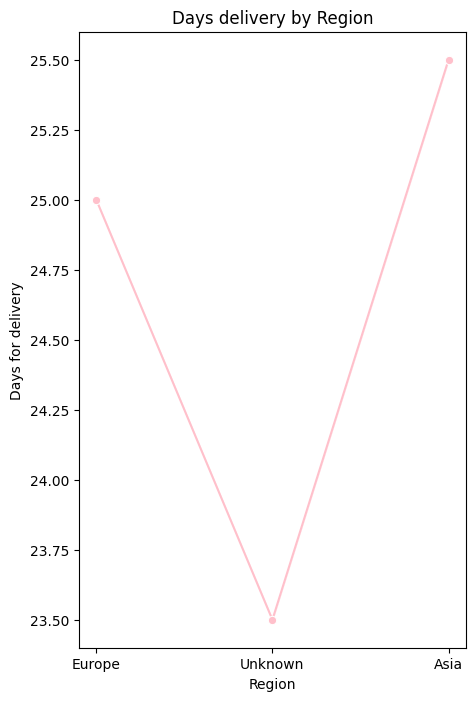

In [ ]:
plt.figure(figsize=(5, 8))
sns.lineplot(data=df, x="region", y="Days for delivery", errorbar=("ci", False), estimator="median", marker="o", color="pink")
plt.xlabel("Region")
plt.title("Days delivery by Region")
plt.show()

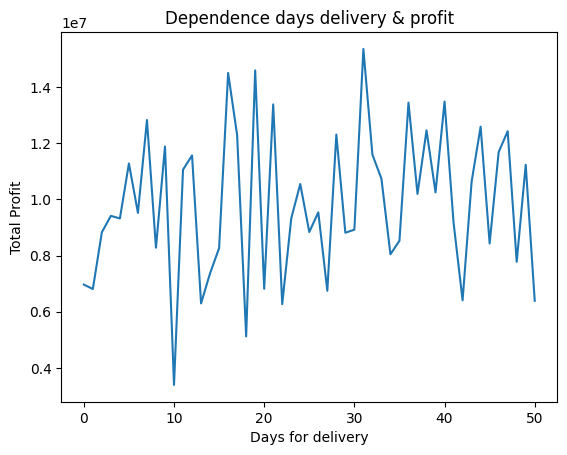

In [ ]:
delivery_table = df.groupby("Days for delivery")["Total Profit"].sum().reset_index()
sns.lineplot(data=delivery_table, x="Days for delivery", y="Total Profit")
plt.title("Dependence days delivery & profit")
plt.show()

A slight increase in profit is observed with longer delivery times; however, this is most likely due to larger order volumes or more sensitive shipping conditions

In [ ]:
df["Year/Month of Order"] = df["Order Date"].dt.to_period("Y")
df["Year/Month of Order"] = df["Year/Month of Order"].dt.to_timestamp()
df

,Order ID,Order Date,Ship Date,Order Priority,Country Code,Product ID,Sales Channel,Units Sold,Unit Price,Unit Cost,...,alpha-2,region,sub-region,item_type,Total Revenue,Total Cost,Total Profit,Delivery Time,Days for delivery,Year/Month of Order
0,100640618,2014-10-08,2014-10-18,M,NOR,2103,Online,650.0,205.70,117.11,...,NO,Europe,Northern Europe,Cereal,133705.00,76121.50,57583.50,10 days,10,2014-01-01
1,100983083,2016-08-11,2016-08-11,C,SRB,2103,Offline,1993.0,205.70,117.11,...,RS,Europe,Southern Europe,Cereal,409960.10,233400.23,176559.87,0 days,0,2016-01-01
2,101025998,2014-07-18,2014-08-11,M,Unknown,7940,Online,4693.0,668.27,502.54,...,Unknown,Unknown,Unknown,Household,3136191.11,2358420.22,777770.89,24 days,24,2014-01-01
3,102230632,2017-05-13,2017-06-13,L,MNE,2455,Online,1171.0,109.28,35.84,...,ME,Europe,Southern Europe,Clothes,127966.88,41968.64,85998.24,31 days,31,2017-01-01
4,103435266,2012-08-11,2012-09-18,H,SRB,1270,Offline,7648.0,47.45,31.79,...,RS,Europe,Southern Europe,Beverages,362897.60,243129.92,119767.68,38 days,38,2012-01-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1325,994504153,2017-01-10,2017-01-13,M,SWE,4594,Online,4734.0,9.33,6.92,...,SE,Europe,Northern Europe,Fruits,44168.22,32759.28,11408.94,3 days,3,2017-01-01
1326,994978797,2014-12-05,2015-01-02,H,ITA,1270,Offline,5192.0,47.45,31.79,...,IT,Europe,Southern Europe,Beverages,246360.40,165053.68,81306.72,28 days,28,2014-01-01
1327,996754205,2010-09-20,2010-09-22,L,RUS,7331,Offline,574.0,255.28,159.42,...,RU,Europe,Eastern Europe,Baby Food,146530.72,91507.08,55023.64,2 days,2,2010-01-01
1328,998043382,2010-06-15,2010-07-03,H,MLT,8293,Online,2070.0,437.20,263.33,...,MT,Europe,Southern Europe,Cosmetics,905004.00,545093.10,359910.90,18 days,18,2010-01-01


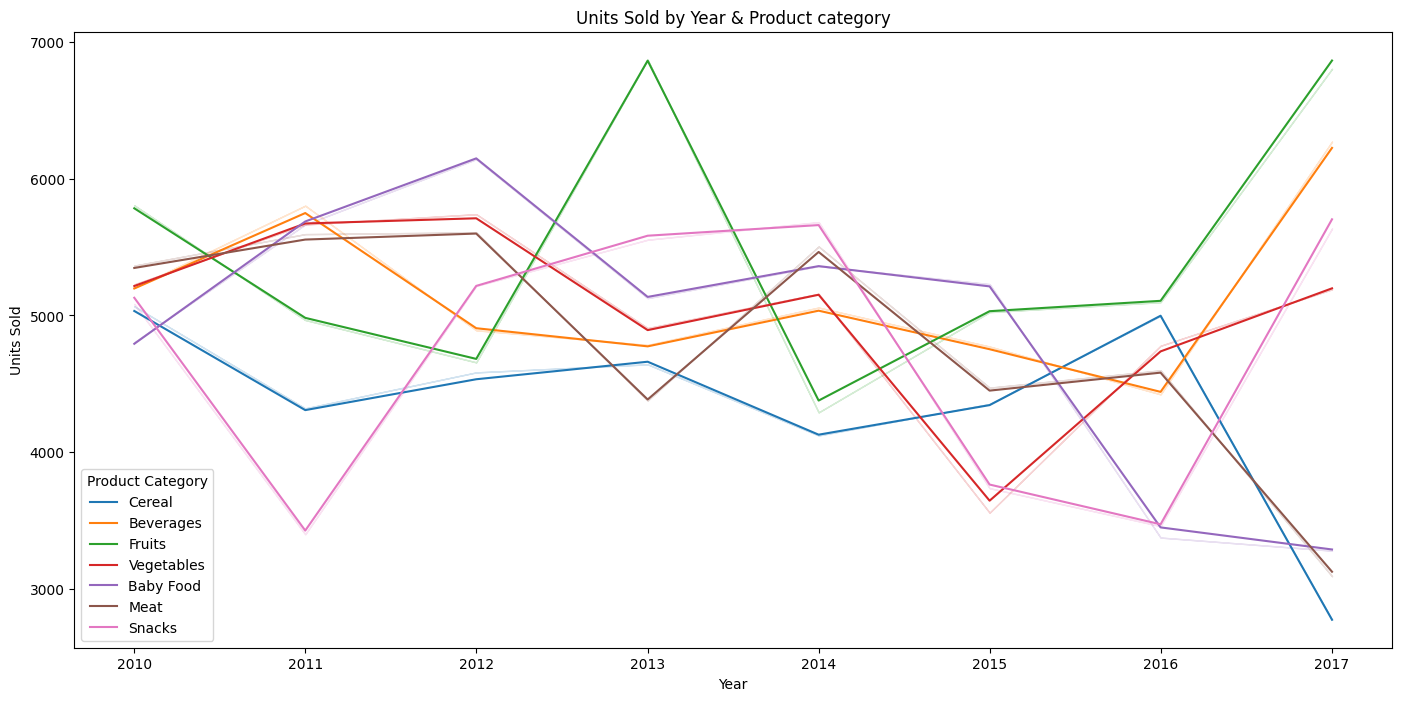

In [ ]:
# To analyze product popularity across different categories, the relevant categories were sorted #
sorted = df[df["item_type"].isin(["Baby Food", "Beverages", "Cereal", "Fruits", "Vegetables", "Snacks", "Meat"])]
plt.figure(figsize=(17,8))
sns.lineplot(data=sorted, x="Year/Month of Order", y="Units Sold", hue="item_type", errorbar=("ci", False))
plt.legend(title="Product Category")
plt.xlabel("Year")
plt.ylabel("Units Sold")
plt.title("Units Sold by Year & Product category")
plt.show()

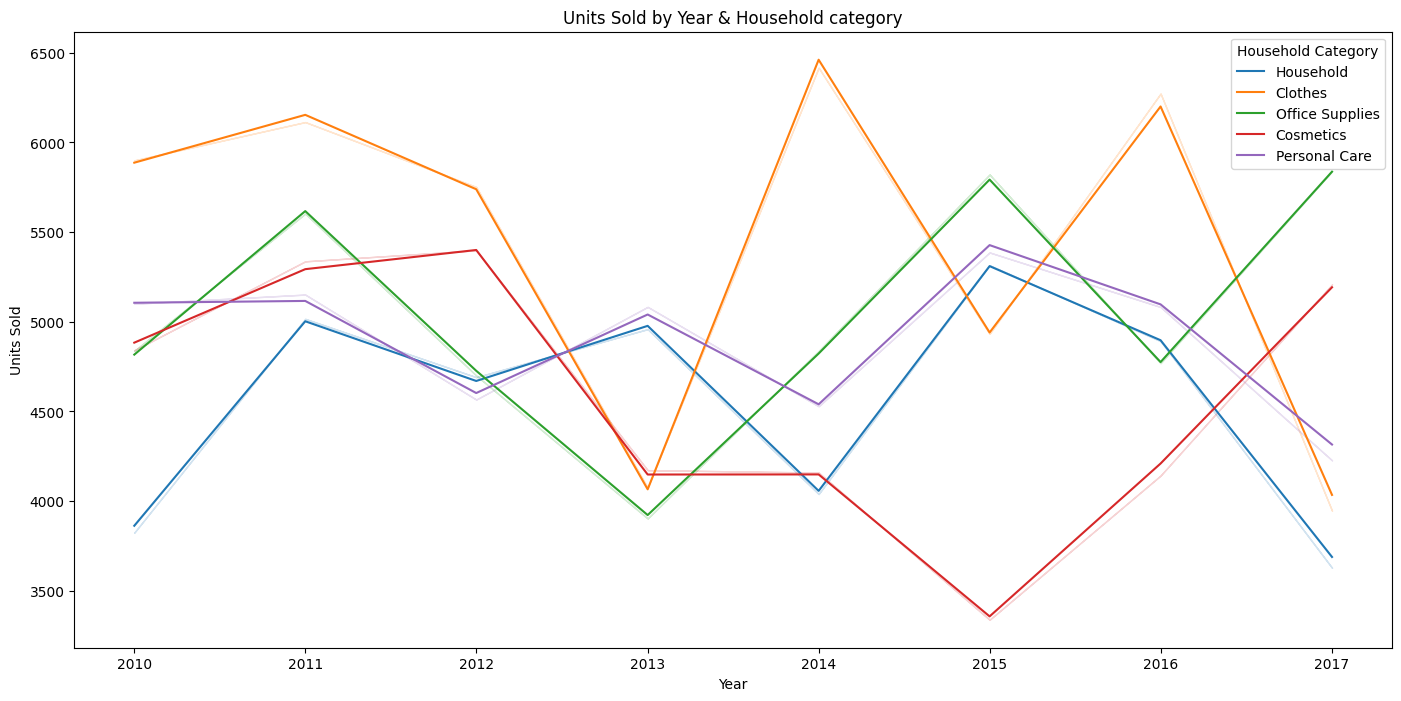

In [ ]:
# The same like previous, but with household type categories #
sorted = df[~df["item_type"].isin(["Baby Food", "Beverages", "Cereal", "Fruits", "Vegetables", "Snacks", "Meat"])]
plt.figure(figsize=(17,8))
sns.lineplot(data=sorted, x="Year/Month of Order", y="Units Sold", hue="item_type", errorbar=("ci", False))
plt.legend(title="Household Category")
plt.xlabel("Year")
plt.ylabel("Units Sold")
plt.title("Units Sold by Year & Household category")
plt.show()

In [ ]:
# Interactive changes by the time units sold by each country #
df_sum = df.groupby(["Country Code", "name", "Year/Month of Order"], as_index=False)["Units Sold"].sum()
fig = px.choropleth(df_sum, locations="Country Code", color="Units Sold", hover_name="name", color_continuous_scale="Viridis", animation_frame="Year/Month of Order")
fig.show()

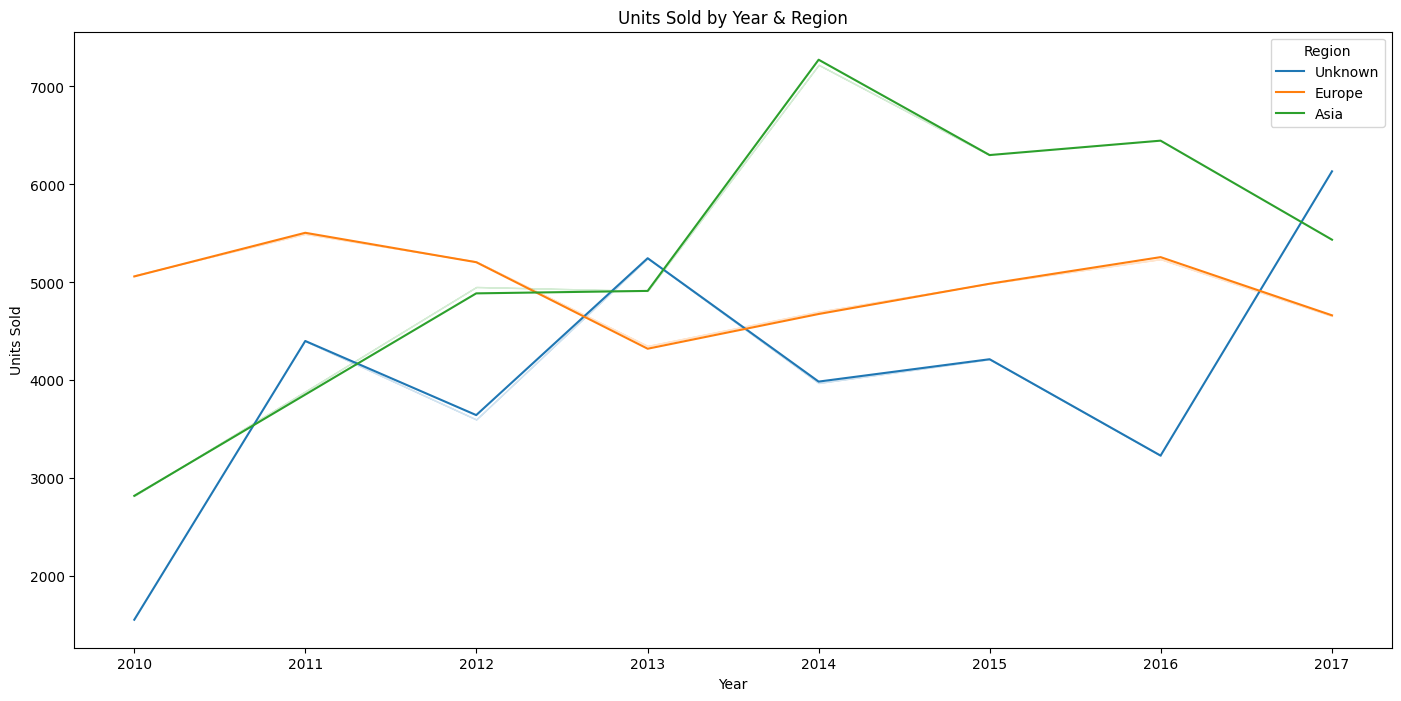

In [ ]:
plt.figure(figsize=(17,8))
sns.lineplot(data=sorted, x="Year/Month of Order", y="Units Sold", hue="region", errorbar=("ci", False))
plt.legend(title="Region")
plt.xlabel("Year")
plt.ylabel("Units Sold")
plt.title("Units Sold by Year & Region")
plt.show()

In [ ]:
df["Day Of Week"] = df["Order Date"].dt.day_name()
df

,Order ID,Order Date,Ship Date,Order Priority,Country Code,Product ID,Sales Channel,Units Sold,Unit Price,Unit Cost,...,region,sub-region,item_type,Total Revenue,Total Cost,Total Profit,Delivery Time,Days for delivery,Year/Month of Order,Day Of Week
0,100640618,2014-10-08,2014-10-18,M,NOR,2103,Online,650.0,205.70,117.11,...,Europe,Northern Europe,Cereal,133705.00,76121.50,57583.50,10 days,10,2014-01-01,Wednesday
1,100983083,2016-08-11,2016-08-11,C,SRB,2103,Offline,1993.0,205.70,117.11,...,Europe,Southern Europe,Cereal,409960.10,233400.23,176559.87,0 days,0,2016-01-01,Thursday
2,101025998,2014-07-18,2014-08-11,M,Unknown,7940,Online,4693.0,668.27,502.54,...,Unknown,Unknown,Household,3136191.11,2358420.22,777770.89,24 days,24,2014-01-01,Friday
3,102230632,2017-05-13,2017-06-13,L,MNE,2455,Online,1171.0,109.28,35.84,...,Europe,Southern Europe,Clothes,127966.88,41968.64,85998.24,31 days,31,2017-01-01,Saturday
4,103435266,2012-08-11,2012-09-18,H,SRB,1270,Offline,7648.0,47.45,31.79,...,Europe,Southern Europe,Beverages,362897.60,243129.92,119767.68,38 days,38,2012-01-01,Saturday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1325,994504153,2017-01-10,2017-01-13,M,SWE,4594,Online,4734.0,9.33,6.92,...,Europe,Northern Europe,Fruits,44168.22,32759.28,11408.94,3 days,3,2017-01-01,Tuesday
1326,994978797,2014-12-05,2015-01-02,H,ITA,1270,Offline,5192.0,47.45,31.79,...,Europe,Southern Europe,Beverages,246360.40,165053.68,81306.72,28 days,28,2014-01-01,Friday
1327,996754205,2010-09-20,2010-09-22,L,RUS,7331,Offline,574.0,255.28,159.42,...,Europe,Eastern Europe,Baby Food,146530.72,91507.08,55023.64,2 days,2,2010-01-01,Monday
1328,998043382,2010-06-15,2010-07-03,H,MLT,8293,Online,2070.0,437.20,263.33,...,Europe,Southern Europe,Cosmetics,905004.00,545093.10,359910.90,18 days,18,2010-01-01,Tuesday


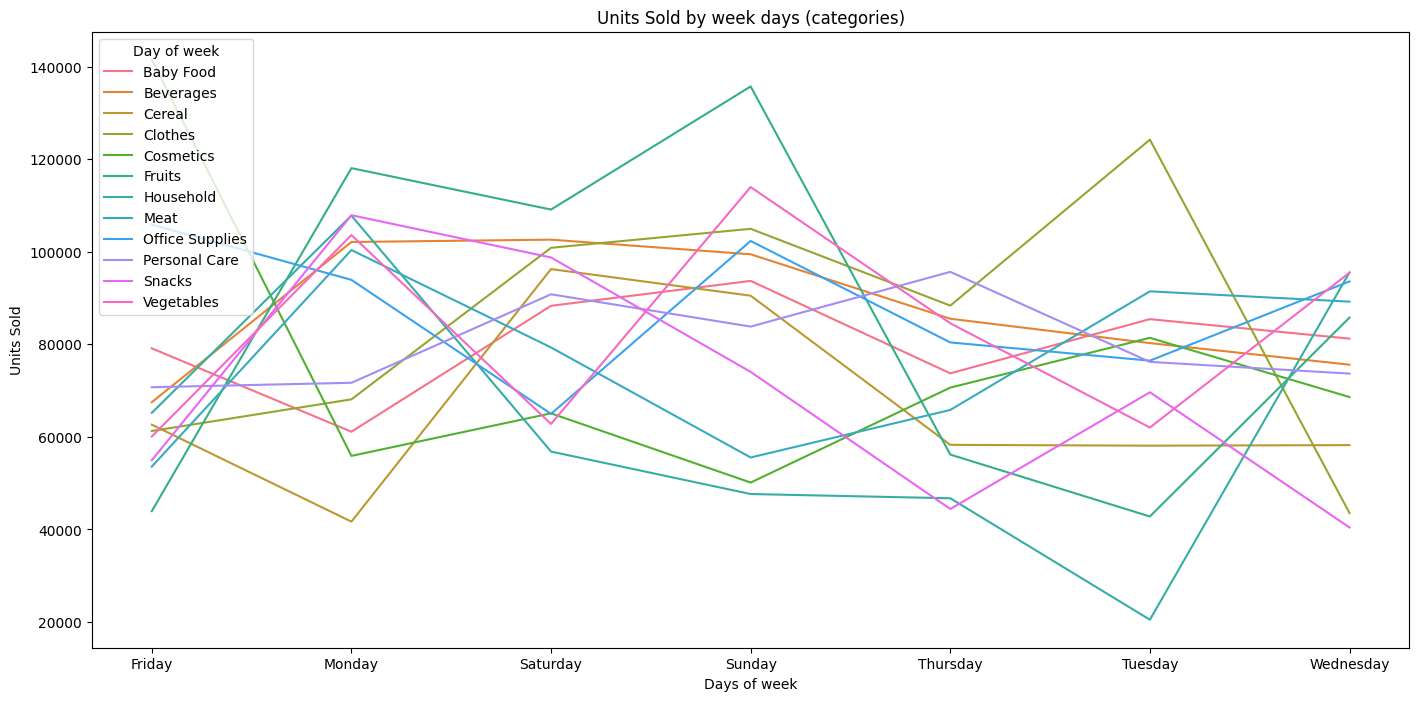

In [ ]:
gr = df.groupby(["Day Of Week", "item_type"])["Units Sold"].sum().reset_index()
plt.figure(figsize=(17,8))
sns.lineplot(data=gr, x="Day Of Week", y="Units Sold", hue="item_type", errorbar=("ci", False))
plt.legend(title="Day of week")
plt.xlabel("Days of week")
plt.ylabel("Units Sold")
plt.title("Units Sold by week days (categories)")
plt.show()

* Sales by Product Categories. The number of units sold is relatively evenly distributed across categories. The most profitable category is Cosmetics, while the least profitable is Fruits. Business takeaway: Focus on expanding and promoting high-margin categories such as Cosmetics. For low-profit categories (Fruits), consider margin optimization or cost reduction strategies.
* Sales by Countries. The leaders in units sold are Ukraine, France, Portugal, Finland, and Germany. In terms of profit, Belarus, Hungary, Czech Republic, and Switzerland lead, which suggests higher-value products dominate in these markets. Business takeaway: In high-profit countries, expand premium product lines; in high-volume countries, leverage scale and promotional campaigns to boost sales.
* Sales by Regions. Asia leads in the number of units sold but generates lower profit. Europe generates the highest profit with fewer units sold, indicating higher product prices. Business takeaway: In Asia, scaling volumes of affordable products is effective, while in Europe, focus should be on premium offerings and maximizing margins.
* Sales Channels. Sales channels are fairly balanced, though Offline slightly dominates over Online. Business takeaway: Online sales have strong growth potential. Investing in digital marketing and e-commerce infrastructure could be especially beneficial for high-margin categories.
* Average Delivery Days. Longest delivery times are observed in Cereal and Baby Food, while the shortest are in Personal Care. By country, Hungary has the longest delivery times, while the UK, Portugal, the Baltic states, and Iceland show the shortest. Business takeaway: Long delivery times can affect customer loyalty and repeat purchases. Optimizing logistics for categories and countries with extended delivery times should be a priority. Since there is no clear correlation between product price and delivery days, companies have flexibility in planning supply chains.